# 3.0 Example - QEXAFS Data Processing - Parameter Definitions

Goal of Workflow:

    1. Use a small spectra set to determine:
        a. energy calibration parameters
        b. normalization parameters
        c. Fouier-Transfomr parameters
    2. These paramters will be applied to the larger data set in a second workbook
    
### Steps:
    1. Import Modules
    2. Define Paths
    3. Define Beamline Data Structure
    4. Add Data to Experiment Object
    5. Clean up Data
    6. Calculate Absorption Spectra
    7. Calibrate Energy and Find E0
    8. Normalize Spectra
    9. Extract EXAFS
    10. Perform Fourier-transform on EXAFS
    11. Save Experiment with 'pickle'

### Things to have ready when attemtping this example:
    1. Directoty containing only XAS spectra
    2. Data structure of the XAS files
    3. Directory and filename where to save the experiment object (pickling)

## Step 1. Import Modules

In [1]:
# DO NOT MODIFY BELOW

# File Handling
import os
import pickle

# Make Plotting interactive
from ipywidgets import interact, fixed

# Wrapper for xraylarch (larch)
os.chdir('..')
pwd = os.getcwd()
os.chdir('./catxas')
import general as fcts
import xas as xfcts
import plot as pfcts
import process
import experiment as exp


# Plot Handling
%matplotlib inline

## Step 2. Define Paths

#### Modify:
    1. data_dir - directory containing XAS spetra ONLY!
    2. pickle_dir - directory where to save the experiment
    3. pickpe_name - filename to save the experiment

In [2]:
# Folder containing ONLY XAS spectra
data_dir = r'D:\UU QEXAFS Workup\Nina - BF31\Fe Edge\Up\Results\Step B\test files'

# Directory where to save the experiment:
pickle_dir = r'D:\UU QEXAFS Workup\Nina - BF31\Fe Edge\Up\Results\Step B'

# File name to save the sxperiment (must include extension '.pickle')
pickle_name = 'BF31-Fe-B-test'

## Step 3. Define Beamline Data Structure

Common data formats for SSRL beamlines can be found in the "BL specific XAS data structures.ipynb" notebook.

In [3]:
### Define the layout of the xas data file and how spectra are calcualted
xas_data_structure = {
    'time stamp': True,
    'time on line': 6,
    'time format': '# First Scan Create Date:\t%m/%d/%Y %I:%M:%S %p ',
    'padded scan numbers': True,
    'column names': ['Encoder', 'Energy', 'ADC_01', 'ADC_02', 'ADC_03', 'ADC_04', 'ADC_05', 'Time', 'Gate'],
    'energy column' : 'Energy', # Energy [eV]
    'sample numerator': 'ADC_01', # I0
    'sample denominator': 'ADC_02', # I1
    'sample ln': True,
    'sample invert': False,
    'reference numerator': 'ADC_01', # I0
    'reference denominator': 'ADC_03', # I2
    'reference ln': True,
    'reference invert': False,
    'is QEXAFS': True
}

## Step 4. Add Data to Experiment Object

    The Experiment class is a dictionary-like obect that is used to store XAS data, process data streams, and correlation and fitting results.
    
### Major steps for adding data to the Experiment class:
    a. Create Experiment Class
    b. Load XAS data into the Experiment object
    

### 4a. Create Experiment Class

#### MODIFY:
    1. exp_name - unique identifier for the experiment object

In [4]:
# Uniquie name for the experiment
exp_name = 'BF31-Fe-B-test'

In [5]:
# DO NOT MODIFY

# Create the Experimental Class
my_exp = exp.Experiment(exp_name)

### 4b. Load XAS data into the Experiment object

In [6]:
# Add raw data into spectra files

# DO NOT MODIFY

my_exp.import_spectra_data(data_dir, xas_data_structure, print_name = False)

## Step 5. Clean up Data

    If spectra were collected using CXAS or QXAS there is a chance that the raw data may need cleaning up to remove duplicate data poins or nan/inf values.
    
#### STILL IN DEVELOPMENT

In [7]:
# DO NOT MODIFY

my_exp.organize_RawData(remove_duplicates=True, remove_nan_inf=False, remove_zeros=False) 
# remove_nan_inf & remove_zeros does not work yet

Duplicate data points removed
Range of data points per raw spectra: 19571-19631
Range of data points per duplicates removed spectra: 19295-19343


## Step 6. Calculate Absorption Spectra

#### MODIFY:
    1. sample_spectra - True = calcualtes sample mux, False = does not calcualte sample mux
    2. ref_spectra - True = calcualtes reference mux, False = does not calcualte reference mux

In [8]:
# Calcualte mux for Sample:
sample_spectra = True

# Calcualte mux for Reference:
ref_spectra = True

In [9]:
# DO NOT MODIFY BELOW

my_exp.calculate_spectra(sample_spectra = sample_spectra, ref_spectra = ref_spectra)

In [10]:
# Visalize absorption spectra 

# Plot Range:

emin = 7000
emax = 7300

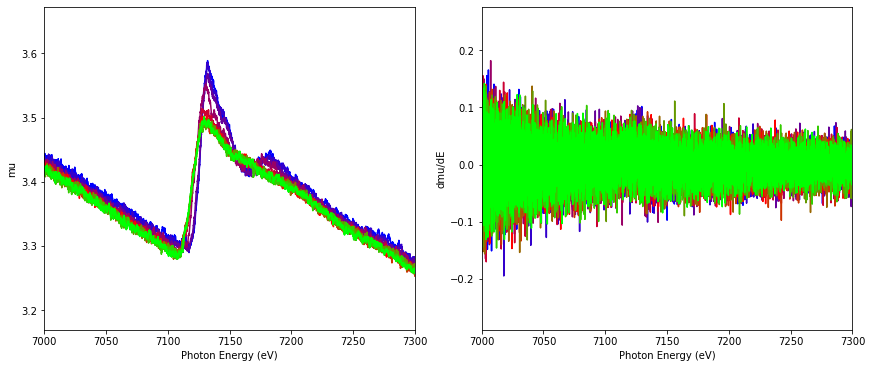

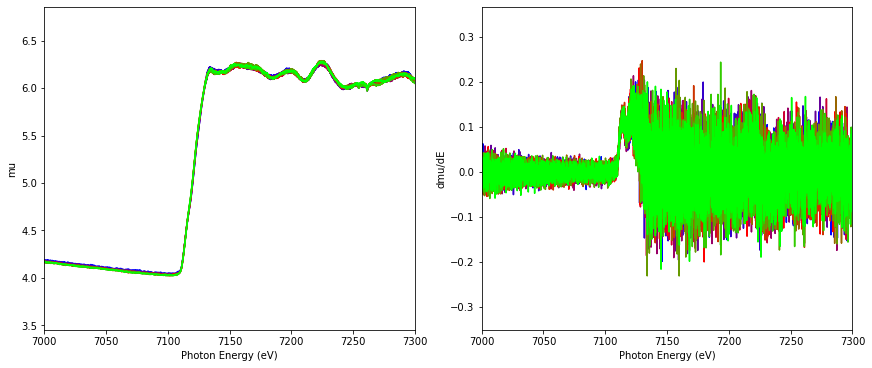

In [11]:
# DO NOT MODIFY BELOW - can, but not needed

# Sample
my_exp.plot_XANES_spectra(emin, emax, samp_ref = 'mu Sample', spectra = 'mu', deriv = True, 
                          e0 = None, e0_line = False, 
                          ref_lines = None, overlay = True, use_legend = False, cmap_name = 'brg', 
                          filtering = False, window_length = 5, polyorder = 2)

# Reference
my_exp.plot_XANES_spectra(emin, emax, samp_ref = 'mu Reference', spectra = 'mu', deriv = True, 
                          e0 = None, e0_line = False, 
                          ref_lines = None, overlay = True, use_legend = False, cmap_name = 'brg', 
                          filtering = False, window_length = 5, polyorder = 2)

## Step 7. Energy Calibration & E0 Determination

### 7a. Energy Calibration and E0 of Reference Channel
    
    There are two options for energy calibration:
        1. Semi-automated - software finds the first derivative maximum in a specified energy range of reference channle
        2. Manual - select edge of reference channel using plot function


    Use either method by converting the code block(s) from "RawNBConvert" to "Code" using the dropdown option at the top fo the screen.

In [12]:
# Option 2a: Manual edge calibration - Find the Edge

# Modify as needed:

# Plotting range:
emin = 7100
emax = 7120


# DO NOT NEED TO MODIFY BELOw
samp_ref = 'mu Reference'
spectra = 'mu'
deriv = True
e0 = None
e0_line = False 
ref_lines = (emin, emax, 0.05)
overlay = True
use_legend = False
cmap_name = 'brg'
filtering = False
window_length = 31
polyorder = 4

# Reset delE
delE_params = {'delE': 0,
              'e0': None}

# Sample
my_exp.load_params('mu Sample', delE_params)

# Reference
my_exp.load_params('mu Reference', delE_params)

interact(my_exp.plot_XANES_spectra,
         emin = fixed(emin),
         emax = fixed(emax),
         samp_ref = fixed(samp_ref),
         spectra = fixed(spectra),
         deriv = fixed(deriv),
         e0 = fixed(e0),
         e0_line = fixed(e0_line),
         ref_lines = ref_lines,
         overlay = fixed(overlay),
         use_legend = fixed(use_legend),
         cmap_name = fixed(cmap_name),
         filtering = fixed(filtering),
         window_length = fixed(window_length),
         polyorder = fixed(polyorder))

interactive(children=(FloatSlider(value=7110.0, description='ref_lines', max=7120.0, min=7100.0, step=0.05), O…

<function ipywidgets.widgets.interaction._InteractFactory.__call__.<locals>.<lambda>(*args, **kwargs)>

In [13]:
# Option 2b: Manual edge calibration - Apply del E and E0

# Modify as needed:

found_edge = 7113.05
Ref_e0 = 7112.0

# DO NOT NEED TO MODIFY BELOW
delE = Ref_e0-found_edge

ref_edge_params = {'delE': delE,
                   'e0': Ref_e0}

samp_edge_params = {'delE': delE}

# Sample
my_exp.load_params('mu Sample', samp_edge_params)

# Reference
my_exp.load_params('mu Reference', ref_edge_params)

print(f'delE parameter: {delE:0.2f}')


delE parameter: -1.05


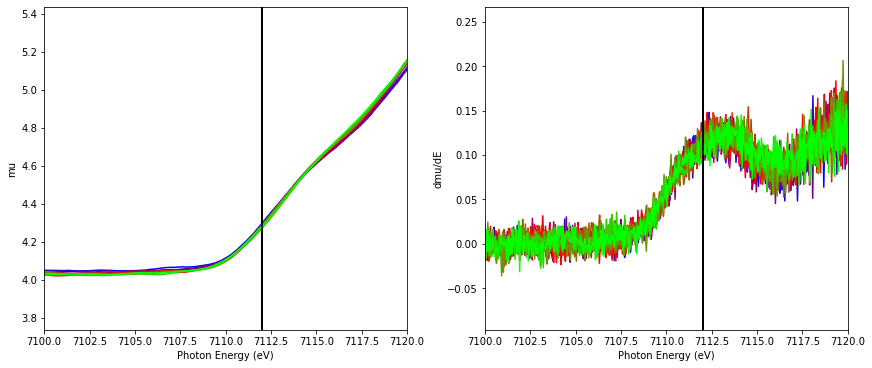

In [14]:
# Check Energy Calibration with Reference Channel
emin = 7100
emax = 7120

my_exp.plot_XANES_spectra(emin, emax, samp_ref = 'mu Reference', spectra = 'mu', deriv = True, 
                          e0 = None, e0_line = True, 
                          ref_lines = None, overlay = True, use_legend = False, cmap_name = 'brg', 
                          filtering = False, window_length = 5, polyorder = 2)

### 7b. Find Sample E0

    There are two options for sample edge (E0) finding:
        1. Semi-automated - software finds the first derivative maximum in a specified energy range of the sample
        2. Manual - select edge of sample channel using plot function


    Use either method by converting the code block(s) from "RawNBConvert" to "Code" using the dropdown option at the top fo the screen.

In [15]:
# Option 2a: Manual edge finding

# Modify as needed:

# Plotting range:
emin = 7100
emax = 7140


# DO NOT NEED TO MODIFY BELOw
samp_ref = 'mu Sample'
spectra = 'mu'
deriv = True
e0 = None
e0_line = False 
ref_lines = (emin, emax, 0.05)
overlay = True
use_legend = False
cmap_name = 'brg'
filtering = True
window_length = 21
polyorder = 2

interact(my_exp.plot_XANES_spectra,
         emin = fixed(emin),
         emax = fixed(emax),
         samp_ref = fixed(samp_ref),
         spectra = fixed(spectra),
         deriv = fixed(deriv),
         e0 = fixed(e0),
         e0_line = fixed(e0_line),
         ref_lines = ref_lines,
         overlay = fixed(overlay),
         use_legend = fixed(use_legend),
         cmap_name = fixed(cmap_name),
         filtering = fixed(filtering),
         window_length = fixed(window_length),
         polyorder = fixed(polyorder))

interactive(children=(FloatSlider(value=7120.0, description='ref_lines', max=7140.0, min=7100.0, step=0.05), O…

<function ipywidgets.widgets.interaction._InteractFactory.__call__.<locals>.<lambda>(*args, **kwargs)>

In [16]:
# Option 2b: Manual edge finding - Apply  E0

# Modify as needed:

found_edge = 7120.0

# DO NOT NEED TO MODIFY BELOW

samp_edge_params = {'e0': found_edge}

# Sample
my_exp.load_params('mu Sample', samp_edge_params)

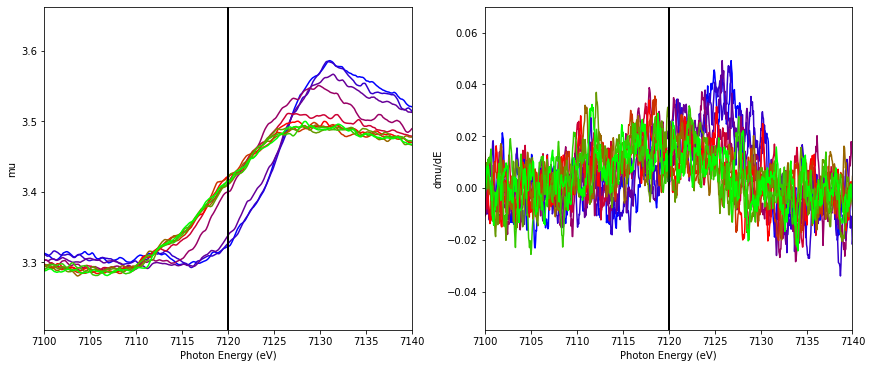

In [17]:
# Check Edge position of Sample Channel

emin = 7100
emax = 7140

my_exp.plot_XANES_spectra(emin, emax, samp_ref = 'mu Sample', spectra = 'mu', deriv = True, 
                          e0 = None, e0_line = True, 
                          ref_lines = None, overlay = True, use_legend = False, cmap_name = 'brg', 
                          filtering = True, window_length = 21, polyorder = 2)

## Step 8. Normalize Spectra

    Normalization using the same parameters as Athena.

### Major steps for normalization will:
    a. Scan the energy ranges of the data and suggest normalization parameters (spectra files need an E0 value)
    b. Set the normalization parameters
    c. Normalize the spectra

### 8a. Define normalization paramaters

In [18]:
# Inspect each spectrum's energy range and suggest normalization paramters

df1 = my_exp.check_Energy_Range(has_e0 = True, spectra_name = 'mu Sample', print_summary = True)

df2 = my_exp.check_Energy_Range(has_e0 = True, spectra_name = 'mu Reference', print_summary = True)

Energy Range and Energy-Step Summary for mu Sample
	Variation in starting energy points between spectra [eV]: 6959.63-6960.14
	Variation in ending energy points between spectra [eV]: 7871.04-7871.66
	Variation in step size of energy points between spectra [eV]: 0.05-0.05

Normalization Parameters for mu Sample
	Edge Energy Range [E0]: 7120.00-7120.00 eV
	Pre-edge start/stop Suggestion [pre1/pre2]: -150/-50
	Post-edge start/stop Suggestion [norm1/norm2]: 75/700
	Normalizaion order Suggestion [nnorm]: 2
	Flatten Spectra Suggestion [make_norm]: True

Energy Range and Energy-Step Summary for mu Reference
	Variation in starting energy points between spectra [eV]: 6959.63-6960.14
	Variation in ending energy points between spectra [eV]: 7871.04-7871.66
	Variation in step size of energy points between spectra [eV]: 0.05-0.05

Normalization Parameters for mu Reference
	Edge Energy Range [E0]: 7112.00-7112.00 eV
	Pre-edge start/stop Suggestion [pre1/pre2]: -150/-50
	Post-edge start/stop Suggesti

In [19]:
# Update values in the dictionary based upon summary results above

#Refernece Normalization paramters, referenced to E0
Ref_norm_params = {'pre1': -150,
                    'pre2': -50,
                    'norm1': 75,
                    'norm2': 700,
                    'nnorm': 2,
                    'make_flat': True
                   }

#Sample Normalization paramters, referenced to E0
Samp_norm_params = {'pre1': -150,
                    'pre2': -50,
                    'norm1': 75,
                    'norm2': 700,
                    'nnorm': 2,
                    'make_flat': True
                   }

### 8b. Import parameters into each spectrum's larch group

Note: This step can be repeated as needed tp upload additiona parameters

In [20]:
# Load normalization parameters into larch groups

# Sample
my_exp.load_params('mu Sample', Samp_norm_params)

# Reference
my_exp.load_params('mu Reference', Ref_norm_params)

### 8c. Normalize the spectra

Note: Normalization steps can be run with updated parameters as needed.

In [21]:
# Normalize Specta
my_exp.normalize_spectra('mu Reference')
my_exp.normalize_spectra('mu Sample')

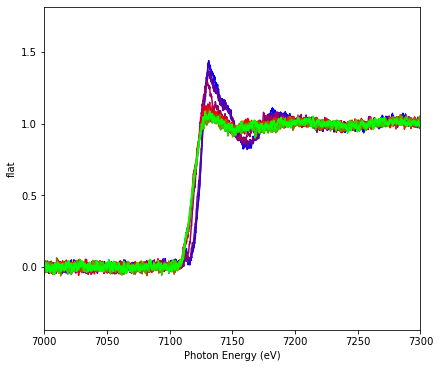

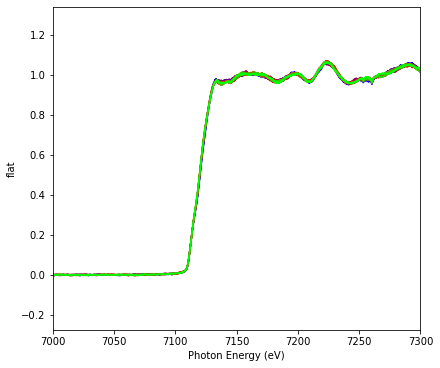

In [22]:
#Visualization of Normalized Spectra

# MODIFY: emin, emax 

emin = 7000
emax = 7300 


# DO NOT MODIFY BELOW

# Sample

S_groups = []


for key in my_exp.spectra.keys():
    S_groups.append(my_exp.spectra[key]['Absorption Spectra']['mu Sample'])
    
pfcts.plot_XANES(S_groups, emin, emax, spectra = 'flat', 
                 deriv = False, e0 = None, e0_line = False, 
                 overlay = True, use_legend = False)

# Reference
    
R_groups = []

for key in my_exp.spectra.keys():
    R_groups.append(my_exp.spectra[key]['Absorption Spectra']['mu Reference'])

pfcts.plot_XANES(R_groups, emin, emax, spectra = 'flat', 
                 deriv = False, e0 = None, e0_line = False, 
                 overlay = True, use_legend = False)

## Step 9. Extract EXAFS

    EXAFS extraction follows the same steps as Athena.

### Major Steps for EXAFS extraction:

    a. Define background subtraction parameters
    b. Import parameters into each spectrum's larch group
    c. Extract EXAFS

### 9a. Define background subtraction parameters

#### Modify:
    Paramters below. Each paramters is annotated if there are preferred/required values

In [23]:
# Sample background subtraction paramters

Samp_bkg_params = {'rbkg': 1,
                  'nknots': None, 
                  'kmin': 0, # Default value = 0, lower spline range
                  'kmax': None, # Default value = None, upper spline range
                  'kweight': 1, # Default value = 1, Rarely Change
                  'dk': 0.1,
                  'win': 'hanning', 
                  'nfft': 2048, # Never Change 
                  'kstep': 0.05, # Never Change
                  'k_std': None, # Never Change
                  'chi_std': None, # Never Change
                  'nclamp': 2,
                  'clamp_lo': 1, 
                  'clamp_hi': 1, 
                  'err_sigma': 1
                   }

# Refernece background subtraction paramters

Ref_bkg_params = {'rbkg': 1,
                  'nknots': None, 
                  'kmin': 0, # Default value = 0, lower spline range
                  'kmax': 13, # Default value = None, upper spline range
                  'kweight': 1, # Default value = 1, Rarely Change
                  'dk': 0.1,
                  'win': 'hanning', 
                  'nfft': 2048, # Never Change 
                  'kstep': 0.05, # Never Change
                  'k_std': None, # Never Change
                  'chi_std': None, # Never Change
                  'nclamp': 2,
                  'clamp_lo': 1, 
                  'clamp_hi': 50, 
                  'err_sigma': 1
                   }

### 9b. Import parameters into each spectrum's larch group

In [24]:
# Load background subtraction parameters into larch groups

# Sample
my_exp.load_params('mu Sample', Samp_bkg_params)

# Reference
my_exp.load_params('mu Reference', Ref_bkg_params)

### 9c. Extract EXAFS

In [25]:
# Extract EXAFS for each spectum

# Sample
my_exp.extract_EXAFS_spectra('mu Sample')

# Reference
my_exp.extract_EXAFS_spectra('mu Reference')

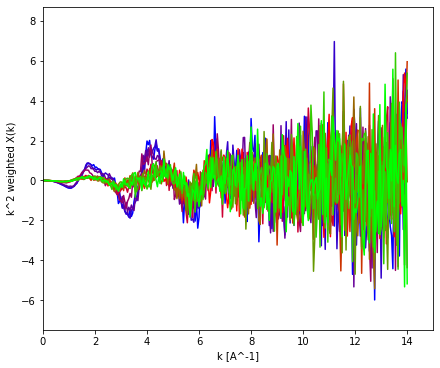

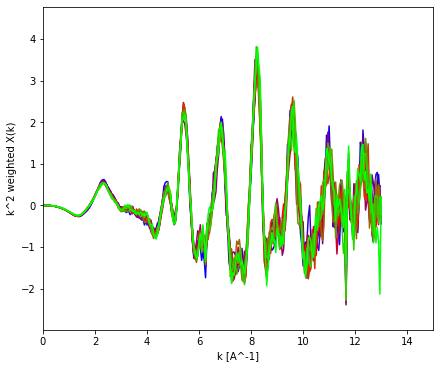

In [26]:
# Visualization of the Extracted EXAFS

# MODIFY: k_weight, kmin, kmax for Sample and Reference

Samp_k_wt = 2
Samp_kmin = 0
Samp_kmax = 15

Ref_k_wt = 2
Ref_kmin = 0
Ref_kmax = 15

# DO NOT MODIFY BELOW

# Sample

S_groups = []

for key in my_exp.spectra.keys():
    S_groups.append(my_exp.spectra[key]['Absorption Spectra']['mu Sample'])
    
pfcts.plot_chi(S_groups, kweight = Samp_k_wt, kmin = Samp_kmin, kmax = Samp_kmax,
               overlay = True, use_legend = False)

# Reference
    
R_groups = []

for key in my_exp.spectra.keys():
    R_groups.append(my_exp.spectra[key]['Absorption Spectra']['mu Reference'])

pfcts.plot_chi(R_groups, kweight = Ref_k_wt, kmin = Ref_kmin, kmax = Ref_kmax, 
               overlay = True, use_legend = False)

## Step 10. Perform Fourier-transform on EXAFS

    Fourier-transform of the extracted EXAFS follows the same steps as Athena.

### Major Steps for Fourier-transform:

    a. Define Fourier-transform parameters
    b. Import parameters into each spectrum's larch group
    c. perform Fourier-transform

    Note: multiple paramters are shared between the background subtraction and the FT. kmin, kmac, and kweight, are the big ones. No plans yets to change this... 

### 10a. Define Fourier-transform parameters

#### Modify:
    Paramters below. Each paramters is annotated if there are preferred/required values

In [27]:
# Refernece FT paramters
Ref_FT_params = {'rmax_out': 10,
                  'kmin': 3,
                  'kmax': 11,
                  'kweight': 2,
                  'dk': 5,
                  'dk2': 5,
                  'window': 'haning',
                  'nfft': 2048, # Never Change
                  'kstep': 0.05 # Never Change
                 }

# Sample FT paramters
Samp_FT_params = {'rmax_out': 10,
                  'kmin': 3,
                  'kmax': 11,
                  'kweight': 2,
                  'dk': 5,
                  'dk2': 5,
                  'window': 'haning',
                  'nfft': 2048, # Never Change
                  'kstep': 0.05 # Never Change
                 }

### 10b. Import parameters into each spectrum's larch group

In [28]:
# Load FT parameters into larch groups

# Sample
my_exp.load_params('mu Sample', Samp_FT_params)

# Reference
my_exp.load_params('mu Reference', Ref_FT_params)

### 10c. Perform Fourier-transform

In [29]:
# Perform FT of EXAFS for each spectum

# Sample
my_exp.FT_EXAFS_spectra('mu Sample')

# Reference
my_exp.FT_EXAFS_spectra('mu Reference')

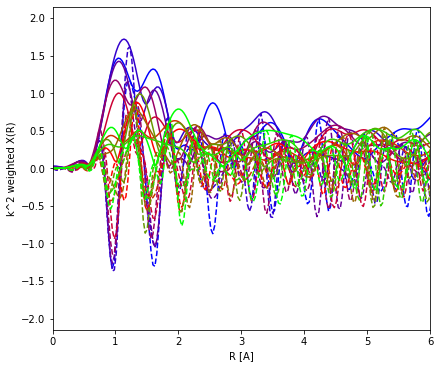

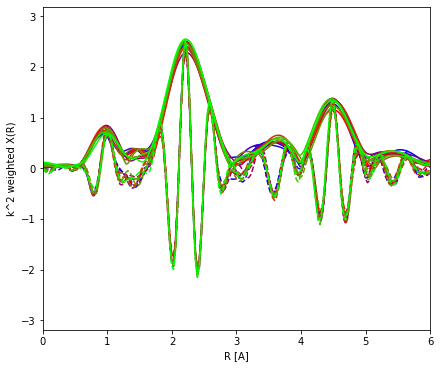

In [30]:
# Visualization of the Fourier-Transformed EXAFS

# MODIFY: Rmin, Rmax, magnitide, imaginary, real for Sample and Reference

Samp_Rmin = 0
Samp_Rmax = 6
Samp_magnitude = True # Show Magnutide of FT
Samp_imaginary = True # Show Imaginary Component of FT
Samp_real = False # Show Real Component of FT

Ref_Rmin = 0
Ref_Rmax = 6
Ref_magnitude = True # Show Magnutide of FT
Ref_imaginary = True # Show Imaginary Component of FT
Ref_real = False # Show Real Component of FT



# DO NOT MODIFY BELOW

# Sample

S_groups = []

for key in my_exp.spectra.keys():
    S_groups.append(my_exp.spectra[key]['Absorption Spectra']['mu Sample'])
    
pfcts.plot_FT(S_groups, Rmin = Samp_Rmin, Rmax = Samp_Rmax, 
              magnitude = Samp_magnitude, imaginary = Samp_imaginary, real = Samp_real, 
              overlay = True, use_legend = False)

# Reference
    
R_groups = []

for key in my_exp.spectra.keys():
    R_groups.append(my_exp.spectra[key]['Absorption Spectra']['mu Reference'])

pfcts.plot_FT(R_groups, Rmin = Ref_Rmin, Rmax = Ref_Rmax, 
              magnitude = Ref_magnitude, imaginary = Ref_imaginary, real = Ref_real, 
              overlay = True, use_legend = False)

## Step 11. Save Experiment with 'pickle' 
    Pickle - A method to save the experimental class and reopen it elsewhere.

In [31]:
pickle_path = os.path.join(pickle_dir,pickle_name+'.pickle')
pickle_out = open(pickle_path,"wb")
pickle.dump(my_exp, pickle_out)
pickle_out.close()

# Do not forget to kill this kernal to prevent pileup on the RAM